importing libraries useful for data manipulation (pandas) data visualization(seaborn and matplotlib) and sklearn for machine learning

### Reading DataSet
here we are reading the dataset and printing some basic information about it

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/covid19_dataset.csv")

In [3]:
df.head(3)  # first 3 rows (instances)

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative


In [4]:
df.describe()  # overall statisticals attributes

,ID,Oxygen,PulseRate,Temperature
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,92.548900,84.976600,100.000700
std,2886.89568,4.611197,26.305841,3.185045
min,0.00000,85.000000,40.000000,95.000000
25%,2499.75000,88.000000,63.000000,97.000000
50%,4999.50000,93.000000,85.000000,100.000000
75%,7499.25000,97.000000,108.000000,103.000000
max,9999.00000,100.000000,130.000000,105.000000


In [5]:
df.info()  # types and cleaness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   Oxygen       10000 non-null  int64 
 2   PulseRate    10000 non-null  int64 
 3   Temperature  10000 non-null  int64 
 4   Result       10000 non-null  object
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [6]:
df["Result"].unique()  # it seems like we have to first transform Result column to a numerical value


array(['Negative', 'Positive'], dtype=object)

In [7]:
df["Result"] = df["Result"].apply(lambda x: 0 if str(x) == "Negative" else 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           10000 non-null  int64
 1   Oxygen       10000 non-null  int64
 2   PulseRate    10000 non-null  int64
 3   Temperature  10000 non-null  int64
 4   Result       10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


### plotting columns to inspect distribution

In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Oxygen'}>,
        <AxesSubplot:title={'center':'PulseRate'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Result'}>]], dtype=object)

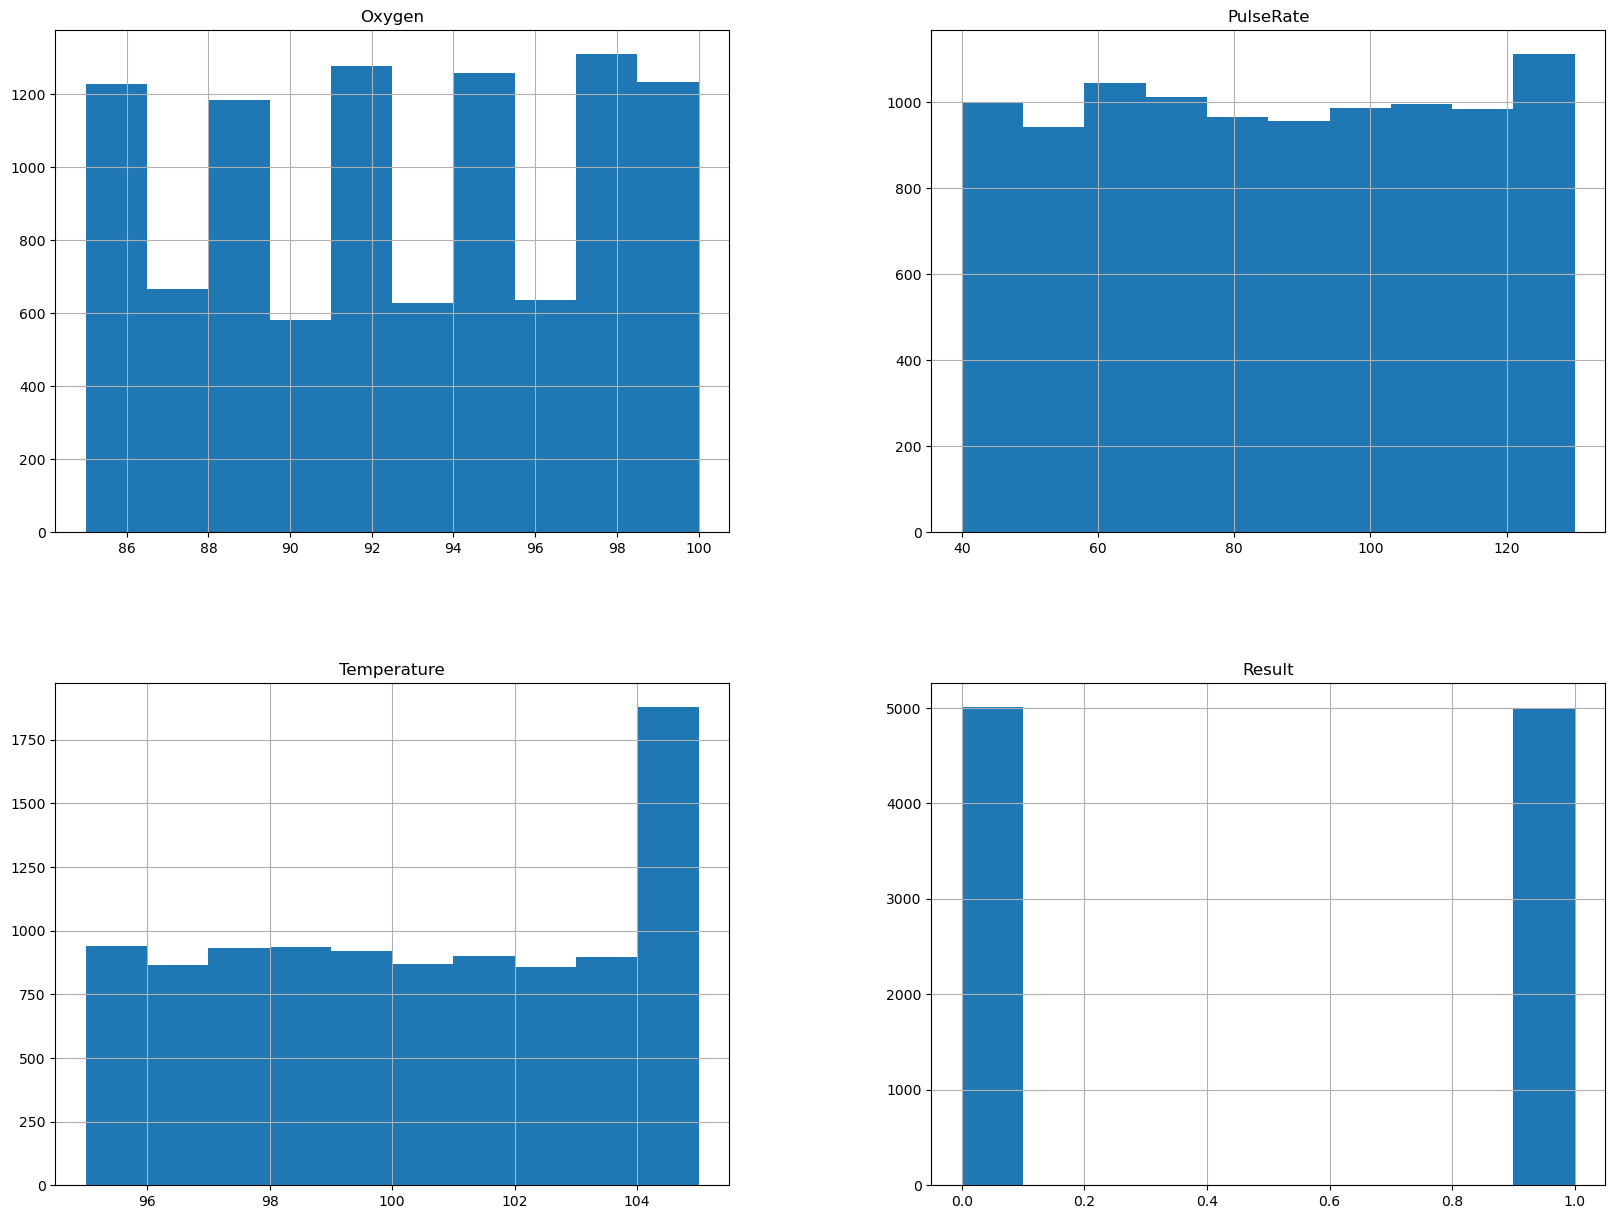

In [9]:
df[["Oxygen", "PulseRate", "Temperature", "Result"]].hist(figsize=(20, 15))

### data appears to be randomly distributed with constant probability (uniform distribution)

<AxesSubplot:xlabel='Temperature', ylabel='PulseRate'>

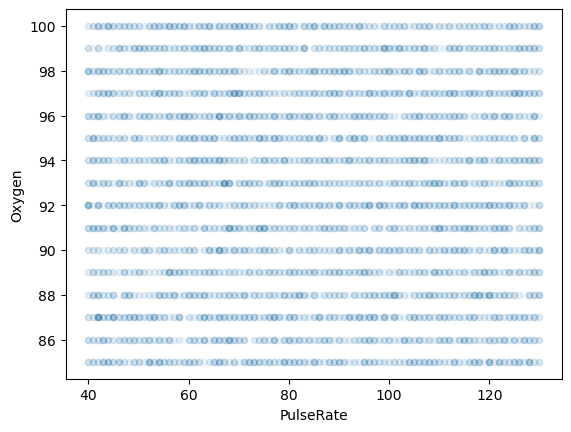

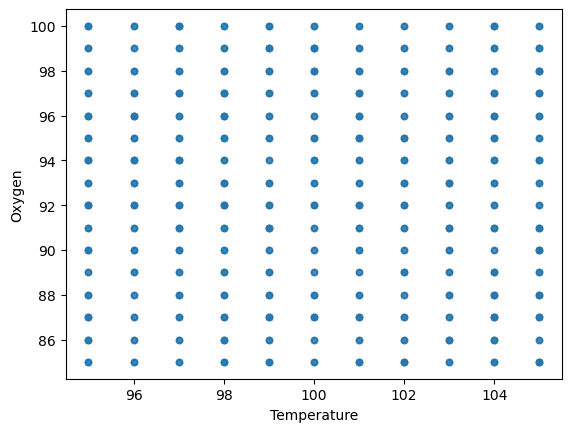

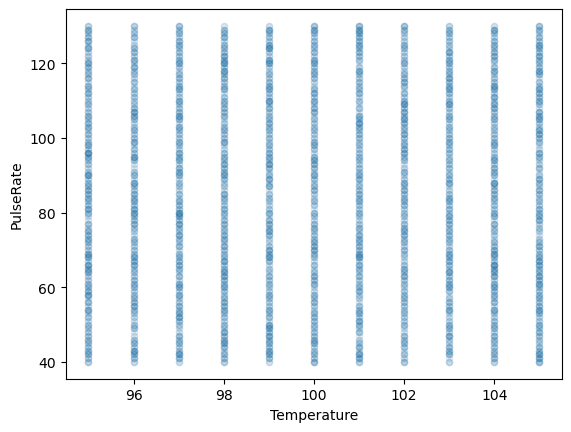

In [10]:
# plotting scatter 2d
df.plot.scatter("PulseRate", "Oxygen", alpha=0.03)
df.plot.scatter("Temperature", "Oxygen", alpha=0.03)
df.plot.scatter("Temperature", "PulseRate", alpha=0.03)

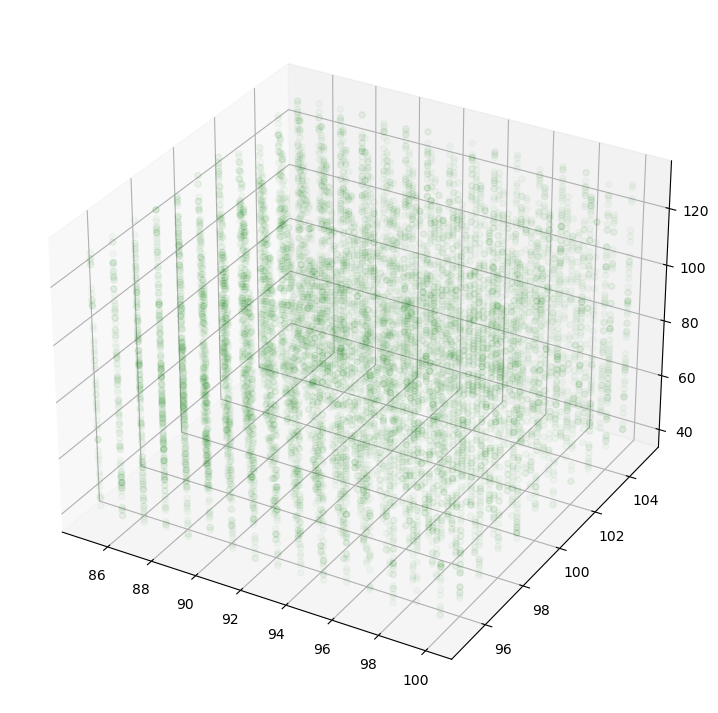

In [11]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection="3d")

# Creating plot
ax.scatter3D(df.Oxygen, df.Temperature, df.PulseRate, color="green", alpha=0.03)
plt.show()

### splitting dataset into test and train set

In [12]:
from sklearn.model_selection import train_test_split

X = df[["Oxygen", "Temperature", "PulseRate"]]  # inputs
Y = df["Result"]  # outputs
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)  # train and test input outputs

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(train_X, train_Y)

In [14]:
predicates_test = gnb.predict(test_X)
predicates_train = gnb.predict(train_X)

### NBC evaluations

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score

cnf_matrix_gnb_test = confusion_matrix(test_Y, predicates_test) # confusion matrix
cnf_matrix_gnb_traint = confusion_matrix(train_Y, predicates_train) # classification report


def specificity_score(actual, pred): # specificity
    '''ArithmeticError: true negative rate'''
    tn, fp, fn, tp = confusion_matrix(actual, pred).ravel()
    return tn / (tn + fp)
    mat = confusion_matrix(actual, pred)
    tn = mat[1][1]
    fp = mat[1][0]
    return tn / (tn + fp)


print("Confusion Matrix for Test Set:")
print(cnf_matrix_gnb_test)

print("Confusion Matrix for Traint Set:")
print(cnf_matrix_gnb_traint)

print("Accuracy Score Test:")
print(metrics.accuracy_score(predicates_test, test_Y))

print("Accuracy Score Train:")
print(metrics.accuracy_score(predicates_train, train_Y))

print("Number of mislabeled points out of a total %d points (Test) : %d" % (
    test_X.shape[0], (test_Y != predicates_test).sum()))
print("Number of mislabeled points out of a total %d points (Train) : %d" % (
    train_X.shape[0], (train_Y != predicates_train).sum()))

Confusion Matrix for Test Set:
[[892 102]
 [124 882]]
Confusion Matrix for Traint Set:
[[3576  440]
 [ 458 3526]]
Accuracy Score Test:
0.887
Accuracy Score Train:
0.88775
Number of mislabeled points out of a total 2000 points (Test) : 226
Number of mislabeled points out of a total 8000 points (Train) : 898


In [16]:
print("Classification Report (Test):")
print(classification_report(test_Y, predicates_test))
print("Classification Report (Train):")
print(classification_report(train_Y, predicates_train))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       994
           1       0.90      0.88      0.89      1006

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4016
           1       0.89      0.89      0.89      3984

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



In [17]:
print("Precision score (Test): {}".format(precision_score(test_Y, predicates_test)))
print("Recall score (Test): {}".format(recall_score(test_Y, predicates_test)))
print("Specificity score (Test): {}".format(specificity_score(test_Y, predicates_test)))
print("Accuracy score (Test): {}".format(accuracy_score(test_Y, predicates_test)))
print("LogLoss score (Test): {}".format(log_loss(test_Y, predicates_test)))
print("F1 score (Test): {}".format(f1_score(test_Y, predicates_test)))
print("R2 score (Test): {}".format(r2_score(test_Y, predicates_test)))
print("")

print("Precision score (Train): {}".format(precision_score(train_Y, predicates_train)))
print("Recall score (Train): {}".format(recall_score(train_Y, predicates_train)))
print("Specificity score (Train): {}".format(specificity_score(train_Y, predicates_train)))
print("Accuracy score (Train): {}".format(accuracy_score(train_Y, predicates_train)))
print("LogLoss score (Train) : {}".format(log_loss(train_Y, predicates_train)))
print("F1 score (Train): {}".format(f1_score(train_Y, predicates_train)))
print("R2 score (Train): {}".format(r2_score(train_Y, predicates_train)))

Precision score (Test): 0.8963414634146342
Recall score (Test): 0.8767395626242545
Specificity score (Test): 0.8767395626242545
Accuracy score (Test): 0.887
LogLoss score (Test): 3.902922512093847
F1 score (Test): 0.8864321608040201
R2 score (Test): 0.5479837274141868

Precision score (Train): 0.8890569843671206
Recall score (Train): 0.8850401606425703
Specificity score (Train): 0.8850401606425703
Accuracy score (Train): 0.88775
LogLoss score (Train) : 3.877021628187385
F1 score (Train): 0.8870440251572328
R2 score (Train): 0.550992815885054


### SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd = SGDClassifier(loss="log_loss", alpha=.0001, penalty='l2', n_jobs=-1)
sgd = sgd.fit(train_X, train_Y)
sgd_predicates_test = sgd.predict(test_X)
sgd_predicates_train = sgd.predict(train_X)

### SGD evaluations

In [20]:
sgd_cnf_matrix_gnb_test = confusion_matrix(test_Y, predicates_test)
sgd_cnf_matrix_gnb_traint = confusion_matrix(train_Y, predicates_train)

print("Confusion Matrix for Test Set:")
print(sgd_cnf_matrix_gnb_test)

print("Confusion Matrix for Traint Set:")
print(sgd_cnf_matrix_gnb_traint)

print("Accuracy Score Test:")
print(metrics.accuracy_score(sgd_predicates_test, test_Y))

print("Accuracy Score Train:")
print(metrics.accuracy_score(sgd_predicates_train, train_Y))

print("Number of mislabeled points out of a total %d points (Test) : %d" % (
    test_X.shape[0], (test_Y != sgd_predicates_test).sum()))
print("Number of mislabeled points out of a total %d points (Train) : %d" % (
    train_X.shape[0], (train_Y != sgd_predicates_train).sum()))

print("Classification Report (Test):")
print(classification_report(test_Y, sgd_predicates_test))
print("Classification Report (Train):")
print(classification_report(train_Y, sgd_predicates_train))

print("Precision score (Test): {}".format(precision_score(test_Y, sgd_predicates_test)))
print("Recall score (Test): {}".format(recall_score(test_Y, sgd_predicates_test)))
print("Specificity score (Test): {}".format(specificity_score(test_Y, sgd_predicates_test)))
print("Accuracy score (Test): {}".format(accuracy_score(test_Y, sgd_predicates_test)))
print("LogLoss score (Test): {}".format(log_loss(test_Y, sgd_predicates_test)))
print("F1 score (Test): {}".format(f1_score(test_Y, sgd_predicates_test)))
print("R2 score (Test): {}".format(r2_score(test_Y, sgd_predicates_test)))

print("")

print("Precision score (Train): {}".format(precision_score(train_Y, sgd_predicates_train)))
print("Recall score (Train): {}".format(recall_score(train_Y, sgd_predicates_train)))
print("Specificity score (Train): {}".format(specificity_score(train_Y, sgd_predicates_train)))
print("Accuracy score (Train): {}".format(accuracy_score(train_Y, sgd_predicates_train)))
print("LogLoss score (Train) : {}".format(log_loss(train_Y, sgd_predicates_train)))
print("F1 score (Train): {}".format(f1_score(train_Y, sgd_predicates_train)))
print("R2 score (Train): {}".format(r2_score(train_Y, sgd_predicates_train)))

Confusion Matrix for Test Set:
[[892 102]
 [124 882]]
Confusion Matrix for Traint Set:
[[3576  440]
 [ 458 3526]]
Accuracy Score Test:
0.82
Accuracy Score Train:
0.81575
Number of mislabeled points out of a total 2000 points (Test) : 360
Number of mislabeled points out of a total 8000 points (Train) : 1474
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       994
           1       1.00      0.64      0.78      1006

    accuracy                           0.82      2000
   macro avg       0.87      0.82      0.81      2000
weighted avg       0.87      0.82      0.81      2000

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      4016
           1       1.00      0.63      0.77      3984

    accuracy                           0.82      8000
   macro avg       0.87      0.82      0.81      8000
weighted avg       0.87      0.8

### Comparing two methods:
in this section we side-to-side compare scores from SGD method against NBC method (same dataset both for train and test is used)

<AxesSubplot:>

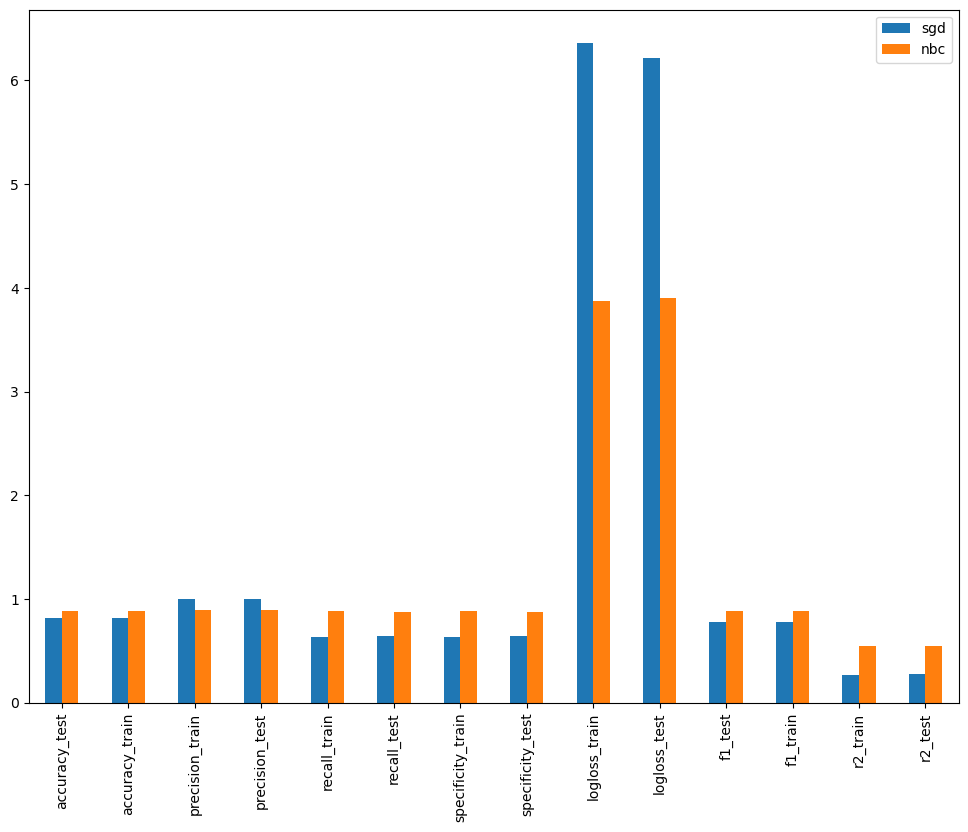

In [21]:

sgd_results = {
    "accuracy_test": accuracy_score(test_Y, sgd_predicates_test),
    "accuracy_train": accuracy_score(train_Y, sgd_predicates_train),

    "precision_train": precision_score(train_Y, sgd_predicates_train),
    "precision_test": precision_score(test_Y, sgd_predicates_test),

    "recall_train": recall_score(train_Y, sgd_predicates_train),
    "recall_test": recall_score(test_Y, sgd_predicates_test),

    "specificity_train": specificity_score(train_Y, sgd_predicates_train),
    "specificity_test": specificity_score(test_Y, sgd_predicates_test),

    "logloss_train": log_loss(train_Y, sgd_predicates_train),
    "logloss_test": log_loss(test_Y, sgd_predicates_test),

    "f1_test": f1_score(test_Y, sgd_predicates_test),
    "f1_train": f1_score(train_Y, sgd_predicates_train),

    "r2_train": r2_score(train_Y, sgd_predicates_train),
    "r2_test": r2_score(test_Y, sgd_predicates_test)

}
nbc_results = {
    "accuracy_test": accuracy_score(test_Y, predicates_test),
    "accuracy_train": accuracy_score(train_Y, predicates_train),

    "precision_test": precision_score(test_Y, predicates_test),
    "precision_train": precision_score(train_Y, predicates_train),

    "recall_test": recall_score(test_Y, predicates_test),
    "recall_train": recall_score(train_Y, predicates_train),

    "specificity_train": specificity_score(train_Y, predicates_train),
    "specificity_test": specificity_score(test_Y, predicates_test),

    "logloss_train": log_loss(train_Y, predicates_train),
    "logloss_test": log_loss(test_Y, predicates_test),

    "f1_test": f1_score(test_Y, predicates_test),
    "f1_train": f1_score(train_Y, predicates_train),

    "r2_train": r2_score(train_Y, predicates_train),
    "r2_test": r2_score(test_Y, predicates_test)
}

index = sgd_results.keys()
sgd_flat_results = [sgd_results[i] for i in index]
nbc_flat_results = [nbc_results[i] for i in index]

compare_df = pd.DataFrame({"sgd":sgd_flat_results, "nbc":nbc_flat_results}, index=index)
compare_df.plot.bar(figsize=(12, 9))